This is a public demo for learning data visualization based on seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Discover the correlation between two variables

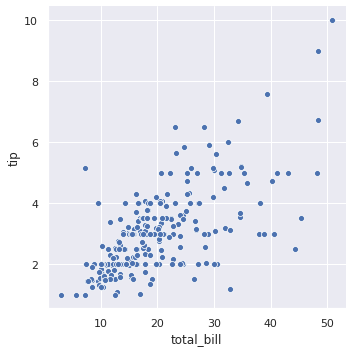

In [6]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

Adding another dimension with hue semantic using color information.

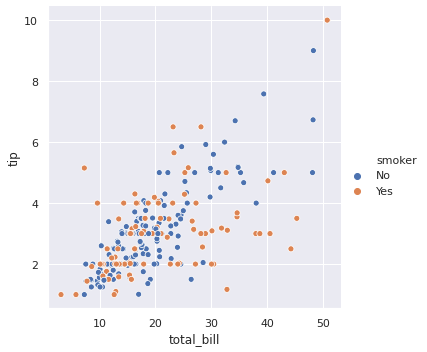

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

With different markers, you can visualization the data clearer

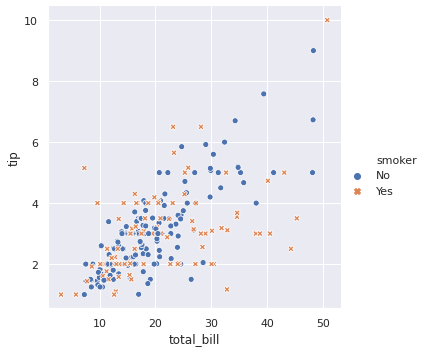

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

If you want to analyze more data in one figure, similar things can be implemented with different markers

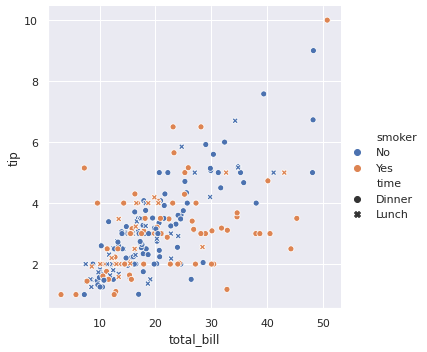

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

To visualize different data, we can use different colors to represent them.

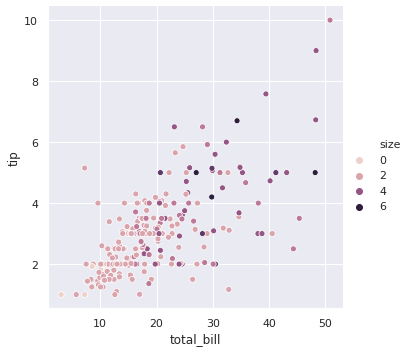

In [10]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

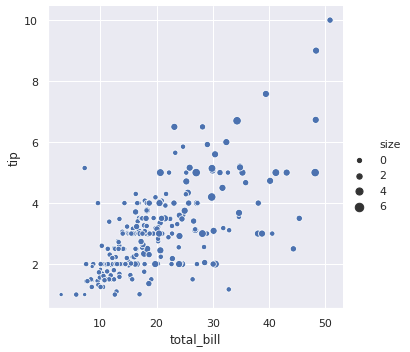

In [11]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

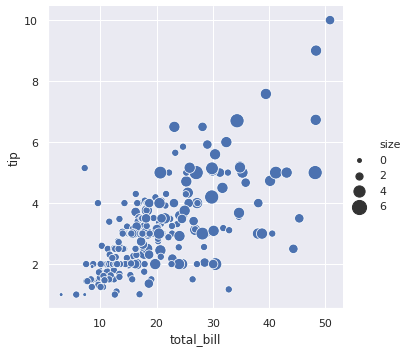

In [14]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

Emphasizing continuity with line plots

In [17]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df

,time,value
0,0,-0.657934
1,1,-0.727364
2,2,0.472033
3,3,2.174967
4,4,2.618384
...,...,...
495,495,16.044001
496,496,17.021651
497,497,17.136666
498,498,16.651313


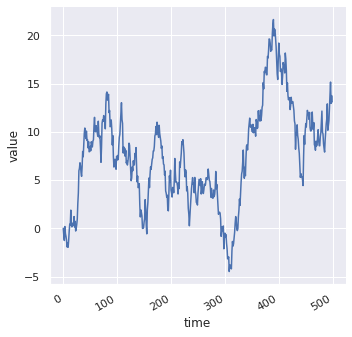

In [18]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

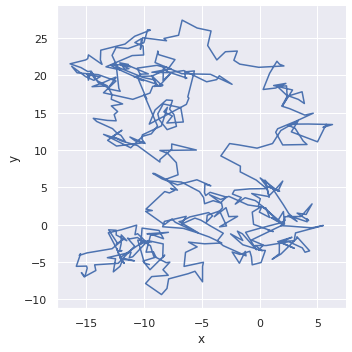

In [19]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

Aggregation and representing uncertainty

In [21]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


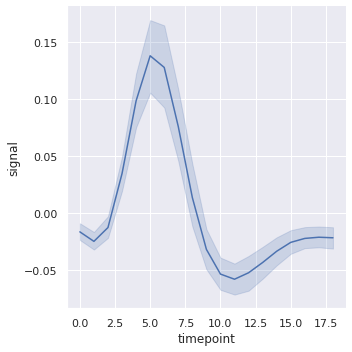

In [25]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

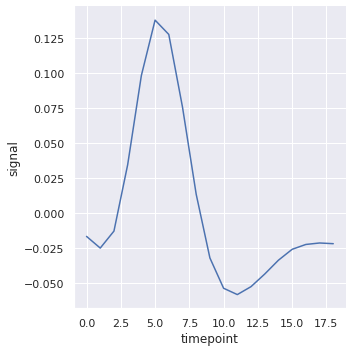

In [26]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

Using Standard Deviation rathere than confidence interval. Change "ci"

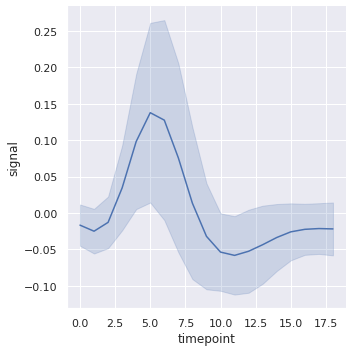

In [27]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

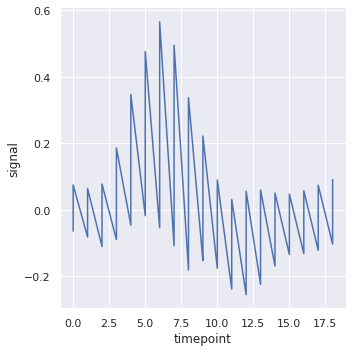

In [28]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

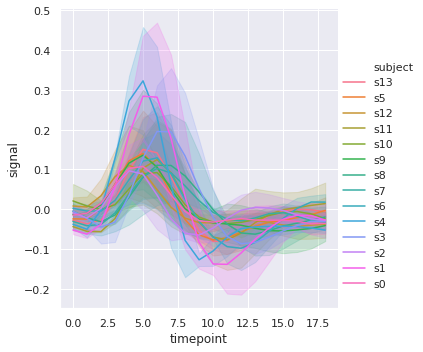

In [30]:
sns.relplot(x="timepoint", y="signal", hue="subject", kind="line", data=fmri);

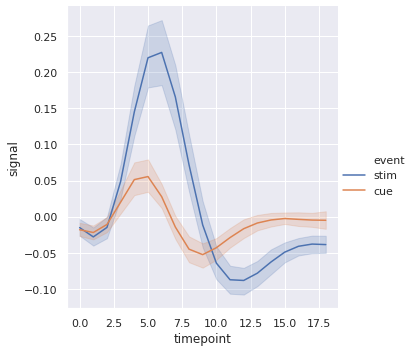

In [31]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

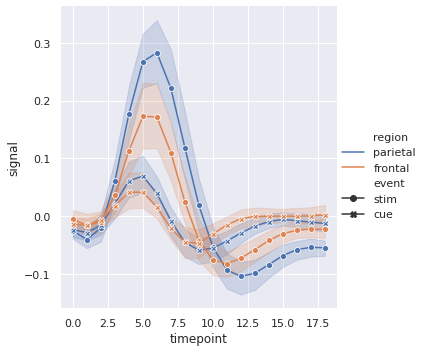

In [32]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

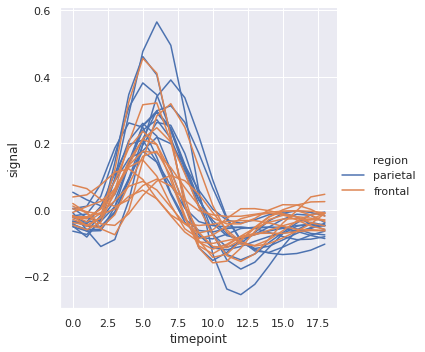

In [33]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

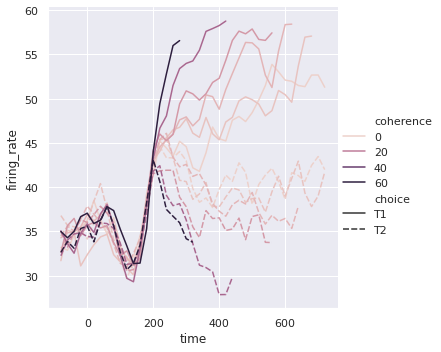

In [34]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

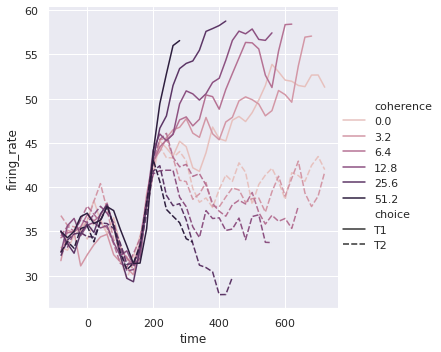

In [35]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

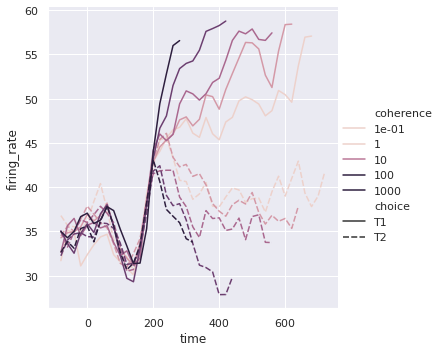

In [36]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

Plotting with date data

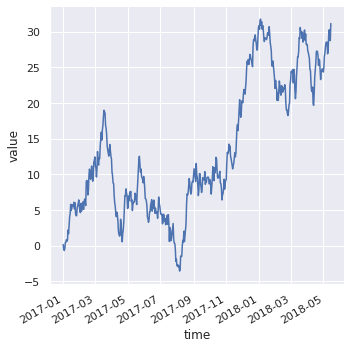

In [37]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

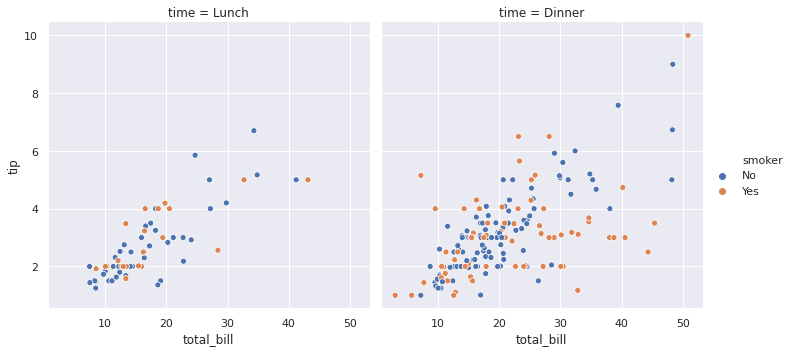

In [38]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

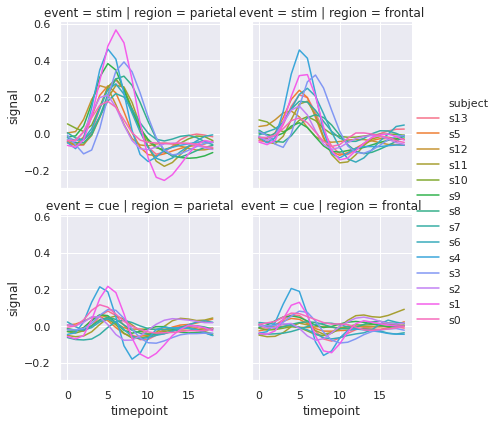

In [39]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

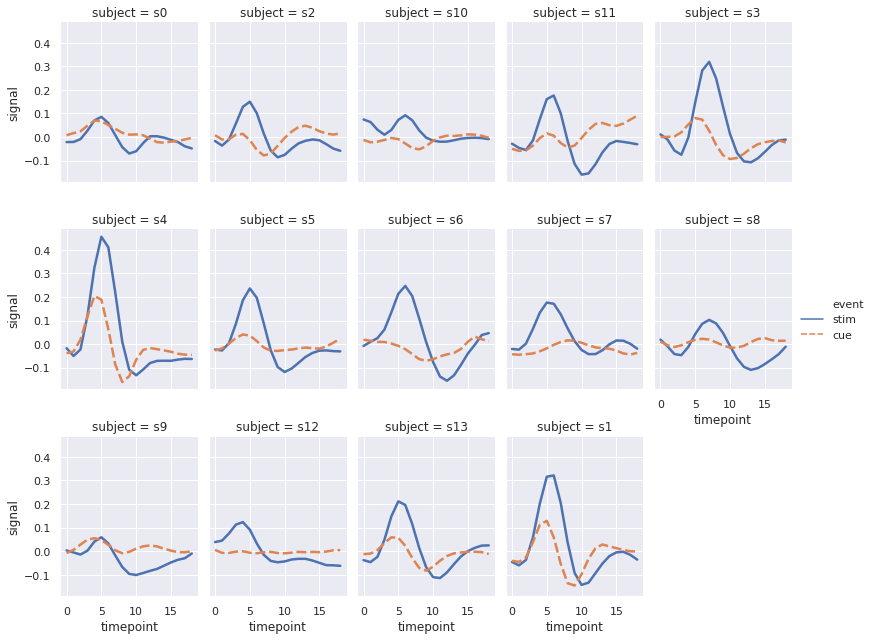

In [40]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));